In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('three_dataset.csv')
df.head()

,age_years,mileage_km,engine_size_liters,price_lakhs
0,1,60517,1.7,9.92
1,3,76234,1.1,7.68
2,5,49954,1.8,8.38
3,3,57280,1.7,9.73
4,1,89459,1.1,7.25


In [6]:
x = df[['age_years', 'mileage_km', 'engine_size_liters']].values.reshape(-1,3)
y = df['price_lakhs'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)

yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)

jb.dump(sc, 'scaler_three.pkl')


['scaler_three.pkl']

In [13]:
def price(age, mileage, size):
    model_path = 'three.keras'
    sc = jb.load('scaler_three.pkl')
    inp = np.array([[age, mileage, size]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else: 
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        model.save('three.keras')
        pred = model.predict(x_norm)
        lv = hist.history['loss']
        
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('loss values')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.title('Actual vs Predicted')
        plt.show()
    return model.predict(np.array(inp))[0][0]*(yx - yn)+yn

Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3492
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3446
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3024
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2735
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2327
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2180
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2077
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1780
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1532
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1419
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1216
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1064
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1050
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0916
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0791
Epoch 16/500
2/2 ━━━━━━━━━━━━━━

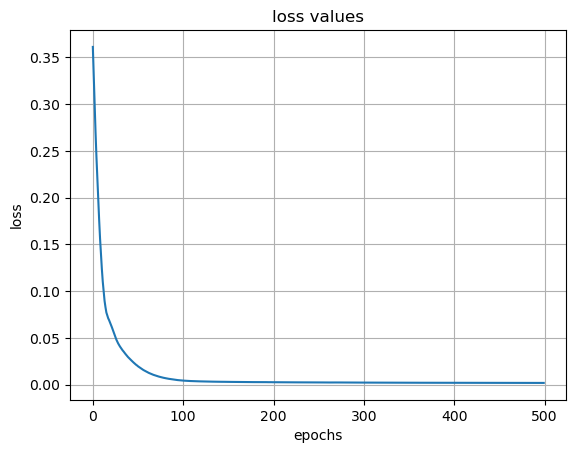

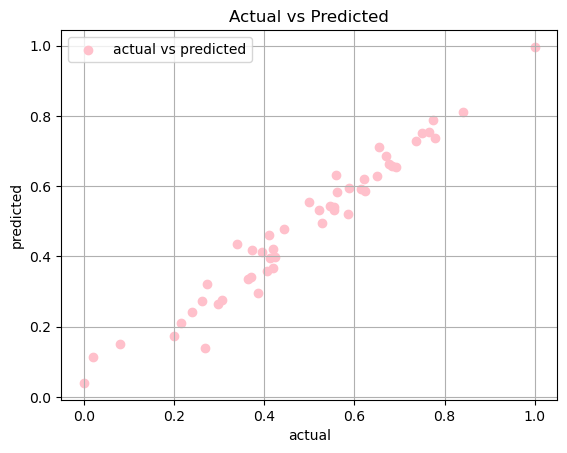

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
8.947202066183092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
6.778243142962456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
10.692833980917932


In [15]:
print(price(3, 40000, 1.2))   # Expected: ~4.5 L
print(price(5, 60000, 1.0))   # Expected: ~3.2 L
print(price(2, 30000, 1.5))   # Expected: ~5.2 L
